In [16]:
import pandas as pd
import numpy as np
import bz2
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train = bz2.BZ2File('../data/train.ft.txt.bz2')
train_lines = train.readlines() 
train_lines = [x.decode('utf-8') for x in train_lines]
train_labels = [i.split(" ")[0] for i in train_lines]
train_texts = [" ".join(i.split(" ")[1:]) for i in train_lines]
df_train = pd.DataFrame(columns= ["Labels", "Features"])
df_train['Labels'] = train_labels
df_train['Features'] = train_texts

In [18]:
test = bz2.BZ2File('../data/test.ft.txt.bz2')
test_lines = test.readlines() 
test_lines = [x.decode('utf-8') for x in test_lines]
test_labels = [i.split(" ")[0] for i in test_lines]
test_texts = [" ".join(i.split(" ")[1:]) for i in test_lines]
df_test = pd.DataFrame(columns= ["Labels", "Features"])
df_test['Labels'] = test_labels
df_test['Features'] = test_texts

In [19]:
df_train.value_counts("Labels")

Labels
__label__1    1800000
__label__2    1800000
dtype: int64

In [20]:
df_test.value_counts("Labels")

Labels
__label__1    200000
__label__2    200000
dtype: int64

Feature Extraction

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [22]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(df_train['Features'])
X_test_tfidf = tfidf.transform(df_test['Features'])
X_train,y_train = X_train_tfidf,df_train['Labels']
X_test,y_test = X_test_tfidf,df_test['Labels']

# X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, df_train['Labels'], random_state = 0)

In [23]:
model = LinearSVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix

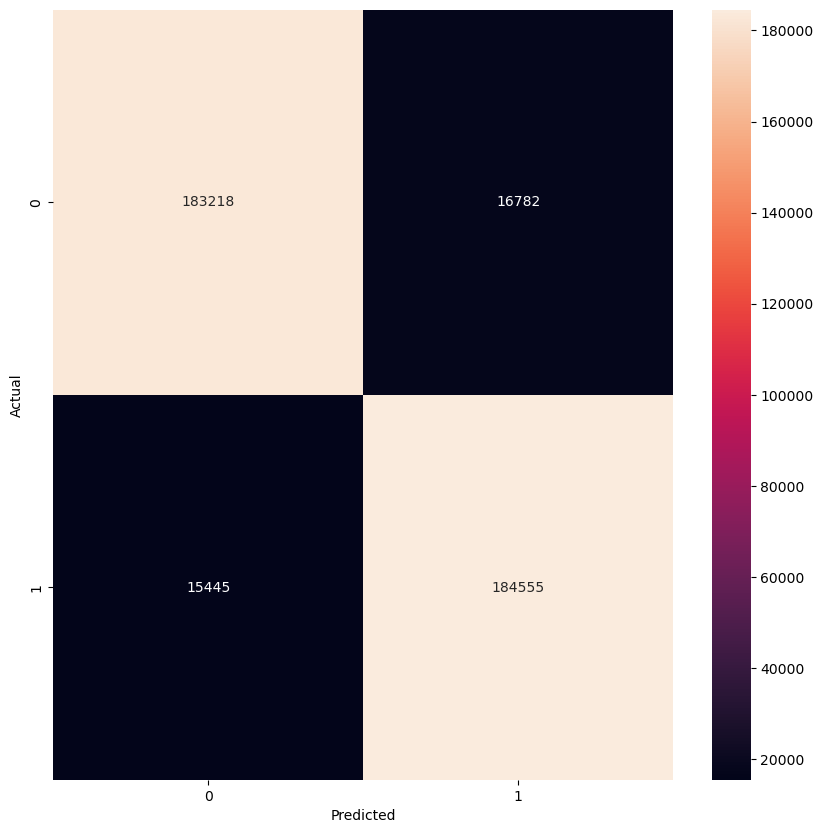

In [25]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

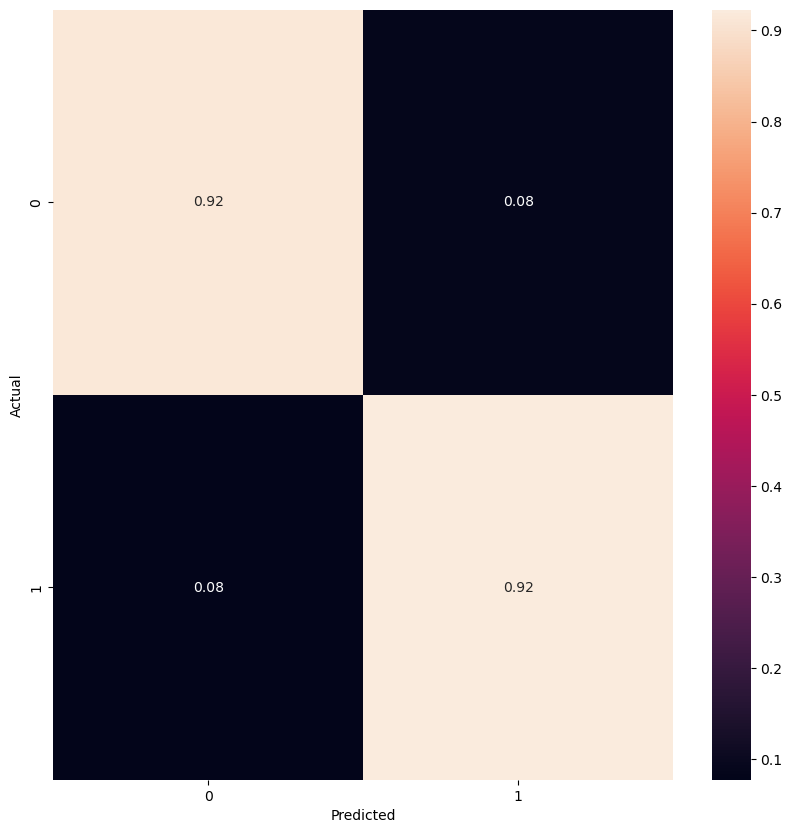

In [26]:
cmn = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  __label__1       0.92      0.92      0.92    200000
  __label__2       0.92      0.92      0.92    200000

    accuracy                           0.92    400000
   macro avg       0.92      0.92      0.92    400000
weighted avg       0.92      0.92      0.92    400000

